In [1]:
import pandas as pd
import numpy as np
#데이터 불러오기 
train_df = pd.read_excel('Training_Test2.xlsx',sheet_name=0)
#행 섞기 
train_df = train_df.sample(frac=1).reset_index(drop=True)

print(train_df.head()[:1])


      crawl_data_id                    title  \
0  2793adb3548fa555  홈케어가 대세 가구업계, 홈케어에 집중한다   

                                             content         crawled_date  \
0  한샘 제공 [한스경제=고예인 기자] 습기가 많은 여름철을 맞아 가구업계가 '홈케어'...  2021-06-07 08:41:43   

  garbage  
0      진성  


In [2]:
train_df["text"] = train_df["title"] + train_df['content']

print(train_df[:1]['text'])


0    홈케어가 대세 가구업계, 홈케어에 집중한다한샘 제공 [한스경제=고예인 기자] 습기가...
Name: text, dtype: object


In [3]:
#라벨인코더를 사용하여 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['garbage'] = label_encoder.fit_transform(train_df['garbage'])

print(train_df[:1])


      crawl_data_id                    title  \
0  2793adb3548fa555  홈케어가 대세 가구업계, 홈케어에 집중한다   

                                             content         crawled_date  \
0  한샘 제공 [한스경제=고예인 기자] 습기가 많은 여름철을 맞아 가구업계가 '홈케어'...  2021-06-07 08:41:43   

   garbage                                               text  
0        1  홈케어가 대세 가구업계, 홈케어에 집중한다한샘 제공 [한스경제=고예인 기자] 습기가...  


In [4]:
#전처리
##빈 text -> NaN, 중복제거, NaN 행 제거 

train_df['text'] = train_df['text'].str.replace("[[0-9]{0,9},{0,1}([0-9]{0,9},{0,1}){0,3}","\$")
train_df['text'] = train_df['text'].str.replace("[^가-힣 \$] ","")

import numpy as np
train_df['text'].replace('', np.nan, inplace=True)
train_df = train_df.dropna(how='any')
train_df.drop_duplicates(['text'], inplace=True)
train_df.loc[train_df.text.isnull()]


<ipython-input-4-adc89ba7b45e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['text'] = train_df['text'].str.replace("[[0-9],{0,1}([0-9],{0,3}){0,4}]","\$")
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\object_array.py:160: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)
<ipython-input-4-adc89ba7b45e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['text'] = train_df['text'].str.replace("[^가-힣 \$] ","")


,crawl_data_id,title,content,crawled_date,garbage,text


In [5]:
train_df.to_excel('tmp.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'http://cafe.naver.com/overseer/15173%20%20http://cafe.naver.com/overseer/13757%20%20%20http://cafe.naver.com/overseer/17834%20%20%20위%20게시글들을%20반드시%20읽어보고,%20작성해%20주셔야%20합니다.%20양식과%20내용이%20충실하지%20못하다고%20판단%20시%20등업거부될%20수%20있습니다.%20%201.%20공사할%20지역%20:%20진주%20%202.%20공사할%20평수%20&%20도면%20:%20%20%20%20%20%203.%20공사할%20내역%20:%20%20%20*철거%20:%20신발장,%20현관타일,%20중문,%20마루,%20거실%20및%20작은방1%20확장,%20아트월,%20싱크대,%20뒷베란다%20미닫이문,%20방문5,%20걸레받이,%20몰딩,%20거실화장실,%20작은방1%20붙박이장,%20안방목창,%20앞베란다장%20%20*도배%20:%20거실(신한),%20방3(lg%20베스티)%20%20*마루%20:%20동화%20나투스진%20그란데%20사하라라이트%20%20*샷시%20:%20거실발코니,%20앞베란다발코니,%20작은방확장부발코니,%20뒷베란다발코니3,%20(kcc%2024T)%20%20*목공%20:%20민자천정,%20거실%20및%20주방벽%20석고보드,%209mm문선,%20마이너스몰딩,%20무걸레받이(거실,주방),%20안방%20목창제거%20창틀,%20거실%20확장부%20및%20뒷베란다%20가벽,%20주방%20간살%20파티션%20%20*중문%20:%20스윙도어%20%20*주방%20및%20가구:%20전실%20하부%20띄움%20낮은%20신발장,%20현관%20낮은%20수납장,%20안방%20붙박이장,%20작은방1붙박이장,%20앞베란다장%20문,%20%20ㄱ자%2

In [6]:
from eunjeon import Mecab
mecab = Mecab()

train_df['text'] = train_df['text'].apply(mecab.morphs)
print(train_df['text'].head()[0])
train_df['tokenized'] = train_df['text'].apply(lambda x : [item for item in x if len(item) > 1 or item == '원'])


['홈', '케어', '가', '대세', '가', '구업', '계', '홈', '케어', '에', '집중', '한다', '한샘', '제공', '[', '한스', '경제', '=', '고', '예', '인', '기자', '습기', '가', '많', '은', '여름철', '을', '맞', '아', '가', '구', '업계', '가', "'", '홈', '케어', '시장', '에', '본격', '적', '인', '날개', '를', '펴', '고', '있', '다', '가', '구', '업체', '가', '홈', '케어', '시장', '에', '주목', '하', '는', '이유', '는', '코로나', '1', '이후', '위생', '과', '방역', '시장', '전망', '이', '긍정', '적', '인', '데', '다', '실적', '정체', '에서', '벗어나', '기', '위한', '결정', '으로', '풀이', '된다', '이', '에', '사무', '용', '가구', '1', '위', '업체', '퍼시스', '까지', '홈', '케어', '시장', '에', '진출', '하', '면서', '신사업', '에', '열', '을', '올리', '고', '있', '다', '.', '¿', 'ω', '¿¿', 'ω', '¿', '코로나', '19', '로', '집', '에', '머무', '는', '시간', '이', '늘', '면서', '쾌적', '한', '주거', '환경', '에', '대한', '소비자', '들', '의', '관심', '이', '늘', '자', '가', '구', '업계', '는', '여름철', '세균', '과', '곰팡이', '번식', '이', '쉬운', '에어컨', '세탁기', '매트리스', '등', '을', '전문가', '가', '청소', '관리', '해', '주', '는', '케어', '서비스', '를', '선보이', '면서', '홈', '케어', '서비스', '시장', '을', '확장', '시켜', '나가', '고', '있', '다', '.'

In [7]:
x_train = train_df['tokenized']
y_train = train_df['garbage']

from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 42)

In [8]:
print(x_train.head())
print(y_train.head())


0    [케어, 대세, 구업, 케어, 집중, 한다, 한샘, 제공, 한스, 경제, 기자, 습...
1    [스테이, 지스, 파워, 어린이, 진동, 칫솔, 배터리, 프린세스, 후기, 스테이,...
2    [키즈, 세이프, 유아, 치약, 도향, 키즈, 세이프, 유아, 치약, 도향, 리뷰,...
3    [샤프란, 로마, 시트, 섬유, 유연제, 코튼, 블로섬, 본품, 후기, 아픈, 주말...
4    [공지, 이건, 창호, 이건, 일우, 기업, Th, 아너, 힐즈, 147, 타입, ...
Name: tokenized, dtype: object
0    1
1    0
2    0
3    0
4    1
Name: garbage, dtype: int32


In [9]:
# def f(x):
#     if x == []:
#         return ''
#     else:
#         return x 

# data_df['tokenized'] = data_df['tokenized'].apply(lambda x :f(x))
# data_df['tokenized'].replace('', np.nan, inplace=True)
# data_df = data_df.dropna(how='any')

In [10]:
# print(len(data_df.index))
# # data_df

In [11]:
#Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(x_train)

In [12]:
# print(tokenizer.word_index)


In [13]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31088
등장 빈도가 1번 이하인 희귀 단어의 수: 9890
단어 집합에서 희귀 단어의 비율: 31.812918167781778
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.6138665239371162


In [14]:
vocab_size = len(tokenizer.word_index) -rare_cnt
vocab_size

21198

In [15]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')

tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)


In [16]:
drop_train = [index for index, sentence in enumerate(x_train) if len(sentence) < 5]
drop_train

[]

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(y_train.shape)


(2682,)
(2682,)


<ipython-input-17-3edc69c96084>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(x_train)


In [18]:
x_train = np.delete(x_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

리뷰의 최대 길이 : 1643
리뷰의 평균 길이 : 228.49142431021625


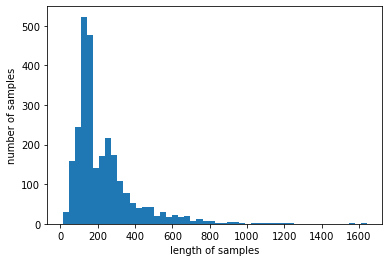

In [19]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 750
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 750 이하인 샘플의 비율: 98.06114839671886


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen = max_len)

In [22]:
category = np.max(y_train)+1
print("카테고리의 종류 : ",category)
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train))

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

카테고리의 종류 :  2
(2682, 750)
(2682,)
[0 1]


In [23]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Conv1D,Dropout, Conv1D, GlobalMaxPooling1D, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model=Sequential()
model.add(Embedding(vocab_size+2, 512))
model.add(Dropout(0.3))
model.add(Conv1D(512, 2, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))



In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         10854400  
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 512)         524800    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 11,445,122
Trainable params: 11,445,122
Non-trainable params: 0
____________________________________________

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=100, callbacks=[es], batch_size=32, validation_split=0.2)
# mode = load_model('saved/conv1D_model_0610.h5')

Epoch 1/100
 2/68 [..............................] - ETA: 58s - loss: 0.6680 - acc: 0.6875 

KeyboardInterrupt: 

In [ ]:
import pickle
model.save('D:/분석팀 스터디/NLP_TEST/0610/saved/conv1D_model_0614.h5')
pickle.dump(tokenizer,open('D:/분석팀 스터디/NLP_TEST/0610/saved/conv1D_tokenizer_0614.pkl','wb'))
pickle.dump(label_encoder,open('D:/분석팀 스터디/NLP_TEST/0610/saved/conv1D_labelencoder_0614.pkl','wb'))



In [ ]:

test_df = pd.read_excel('Training_Test.xlsx',sheet_name=3)
test_df['text'] = test_df[]


In [ ]:
y_predict = model.predict(x_test)


In [ ]:
y_predict.shape

In [ ]:
y_predict = y_predict.argmax(axis=1)


In [ ]:
print(y_predict.shape)
print(y_test.values.shape)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test.values, y_predict)
acc


In [ ]:
# label_encoder.inverse_transform(y_predict[:10])
print(pd.__version__)
